In [1]:
from gensim.models import FastText
from tqdm import tqdm
import logging
import csv
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from gensim import models
import numpy as np
import matplotlib.font_manager as fm
from sklearn.preprocessing import StandardScaler

In [2]:
binpath = 'D:Applications/Fasttext/cc.ko.300.bin.gz'

ko_model = models.fasttext.load_facebook_model(binpath)

In [16]:
file_path = 'D:\KAM-LR\정서데이터ML_0224.csv'
df = pd.read_csv(file_path, sep=',')
df = df[['ID','Positive experience', 'Negative experience','Agree_M','Con_M','Extra_M','Neuro_M','Open_M','PA1','PA2','PA3','PA4','PA5',
         'PA1score','PA2score','PA3score','PA4score','PA5score','NA1','NA2','NA3','NA4','NA5','NA1score','NA2score','NA3score','NA4score','NA5score']]

In [17]:
df = df.dropna(how='all')

In [18]:
df

,ID,Positive experience,Negative experience,Agree_M,Con_M,Extra_M,Neuro_M,Open_M,PA1,PA2,...,NA1,NA2,NA3,NA4,NA5,NA1score,NA2score,NA3score,NA4score,NA5score
0,1.0,내가 2년동안 전우들과 동고동락한 부대에서 전역식을 한 일,전역을 하고 복학을 하니 학교에 아는 사람이 거의 없었다,3.000000,3.000000,1.666667,2.000000,2.000000,기쁨,시원섭섭함,...,슬픔,씁슬함,무료함,NaN,NaN,3.0,4.0,3.0,NaN,NaN
1,2.0,유학시절에 만났던 친구가 2년 만에 한국을 방문하여 관광도 하고 친구들도 보여주고 ...,온 식구가 모여 오랜만에 식사를 하는 자리에서 스트레스를 받아 울었던 일.,4.000000,4.000000,1.666667,2.000000,2.000000,즐거움,피로,...,수치심,자괴감,슬픔,외로움,경멸,3.0,5.0,5.0,3.0,4.0
2,3.0,한달전에 공모했던 기업체의 공모전 예선안에 뽑힌 경험이 긍정적이었음,감기에 걸려서 몸이 매우 좋지 않고 낫지도 않았던 경험,2.333333,3.333333,3.000000,3.333333,4.333333,기쁨,놀라움,...,슬픔,힘듬,아픔,추움,쓸쓸함,4.0,5.0,5.0,5.0,3.0
3,4.0,"영화관에서 영화를 보았는데 영화가 재미있었습니다, 영화관 근처 음식도 맛있었습니다.",아버지께 뺨을 맞았고 화가 나서 저도 아베지께 대들었습니다. 그리고 집에서 나왔습니다.,3.000000,3.666667,2.666667,3.000000,4.000000,행복,즐거움,...,분노,원망,슬픔,NaN,NaN,4.0,4.0,4.0,NaN,NaN
4,5.0,퇴근 후 홈트를 시작했는데 근육도 잡히고 살도 빠졌다 . 매일 하는데 뿌듯하다 .,회사에 동기가 있는데 나보다 나이도 많은데 입사 동기면서 업무 지시를 자꾸 하고 쎄...,3.666667,4.666667,2.666667,3.333333,5.000000,뿌듯함,자존감 상승,...,거슬림,짜증남,불쾌,NaN,NaN,1.0,1.0,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4384,4385.0,일을 할 때에 업무에 대한 실수가 있었는데 상급자의 도움으로 처리할 수 있었다.,회사 내에서 업무 실수를 해서 이를 처리하는데 시간이 좀 걸렸다.,3.000000,4.000000,2.666667,3.000000,2.666667,고마움,긍정,...,우울,당황,슬픔,NaN,NaN,1.0,3.0,2.0,NaN,NaN
4385,4386.0,좋아하는 사람 또는 다른 분야의 업무를 하는 사람들과 생각지 못한 대화를 통해서 새...,남의것을 탐하는 사람들의 불필요한 욕심들.....하 진짜 싫어,3.333333,3.000000,3.000000,3.333333,3.333333,새로움,반성,...,짜증,어이없음,화남,분노,재수없음,5.0,4.0,5.0,5.0,5.0
4386,4387.0,그냥 다이어트 성공 바다보러간거 맛있는거 먹은거 기차여행,부모님과 싸움 돈잃어버림 머 그다지 없는데 잘모르겠다 사고싶은옷 못산거,2.333333,2.666667,2.666667,2.333333,2.666667,기쁨,개운함,...,아쉬움,억울함,화남,NaN,NaN,3.0,3.0,2.0,NaN,NaN
4387,4388.0,"1. 친구생일파티 / 빕스에서 밥을 대접하고, 축하를 해주었음 2. 해외여행 / 호...",1. 싸움 / 남자친구와 소리를 지르며 싸움 2. 상사와 업무스타일이 맞지 않음,3.666667,4.666667,4.333333,2.000000,5.000000,행복,즐거움,...,짜증,분노,답답,NaN,NaN,4.0,4.0,5.0,NaN,NaN


In [19]:
my_dict = {}
for i, row in df.iterrows():
        my_dict[df.at[i,'ID']] = [(str(df.at[i,'PA1']),df.at[i,'PA1score']),(str(df.at[i,'PA2']),df.at[i,'PA2score']),(str(df.at[i,'PA3']),df.at[i,'PA3score']),(str(df.at[i,'PA4']),df.at[i,'PA4score']),(str(df.at[i,'PA5']),df.at[i,'PA5score'])]
for i, row in df.iterrows():
        my_dict[df.at[i,'ID']+4389] = [(str(df.at[i,'NA1']),df.at[i,'NA1score']),(str(df.at[i,'NA2']),df.at[i,'NA2score']),(str(df.at[i,'NA3']),df.at[i,'NA3score']),(str(df.at[i,'NA4']),df.at[i,'NA4score']),(str(df.at[i,'NA5']),df.at[i,'NA5score'])]

In [22]:
print(len(my_dict))
print(my_dict)

8778
{1.0: [('기쁨', 5.0), ('시원섭섭함', 3.0), ('황홀함', 4.0), ('nan', nan), ('nan', nan)], 2.0: [('즐거움', 4.0), ('피로', 5.0), ('아쉬움', 3.0), ('재밌음', 4.0), ('뿌듯함', 3.0)], 3.0: [('기쁨', 3.0), ('놀라움', 4.0), ('좋음', 3.0), ('행복', 3.0), ('들뜸', 4.0)], 4.0: [('행복', 3.0), ('즐거움', 3.0), ('신남', 3.0), ('nan', nan), ('nan', nan)], 5.0: [('뿌듯함', 2.0), ('자존감 상승', 2.0), ('개운함', 1.0), ('nan', nan), ('nan', nan)], 6.0: [('뿌듯', 4.0), ('기쁨', 4.0), ('행복', 5.0), ('nan', nan), ('nan', nan)], 7.0: [('재미있다', 4.0), ('새롭다', 3.0), ('익숙하다', 2.0), ('nan', nan), ('nan', nan)], 8.0: [('행복', 5.0), ('살만하다', 5.0), ('충족', 5.0), ('nan', nan), ('nan', nan)], 9.0: [('행복', 5.0), ('편안함', 5.0), ('즐거움', 5.0), ('사랑스러움', 5.0), ('느긋함', 5.0)], 10.0: [('고마움', 4.0), ('재미남', 4.0), ('친절함', 5.0), ('nan', nan), ('nan', nan)], 11.0: [('뿌듯', 4.0), ('알차다', 5.0), ('보람', 4.0), ('nan', nan), ('nan', nan)], 12.0: [('행복', 3.0), ('성취감', 5.0), ('설레임', 5.0), ('자랑스러움', 5.0), ('nan', nan)], 13.0: [('여유로움', 3.0), ('행복함', 5.0), ('기쁨', 5.0), ('싱그러움', 5.0), ('들뜬', 5

In [23]:
for key, val in my_dict.items():
    if val[3][0] == 'nan':
        my_dict[key] = val[:2]
    if val[4][0] == 'nan':
        my_dict[key] = val[:3]
print(my_dict)


{1.0: [('기쁨', 5.0), ('시원섭섭함', 3.0), ('황홀함', 4.0)], 2.0: [('즐거움', 4.0), ('피로', 5.0), ('아쉬움', 3.0), ('재밌음', 4.0), ('뿌듯함', 3.0)], 3.0: [('기쁨', 3.0), ('놀라움', 4.0), ('좋음', 3.0), ('행복', 3.0), ('들뜸', 4.0)], 4.0: [('행복', 3.0), ('즐거움', 3.0), ('신남', 3.0)], 5.0: [('뿌듯함', 2.0), ('자존감 상승', 2.0), ('개운함', 1.0)], 6.0: [('뿌듯', 4.0), ('기쁨', 4.0), ('행복', 5.0)], 7.0: [('재미있다', 4.0), ('새롭다', 3.0), ('익숙하다', 2.0)], 8.0: [('행복', 5.0), ('살만하다', 5.0), ('충족', 5.0)], 9.0: [('행복', 5.0), ('편안함', 5.0), ('즐거움', 5.0), ('사랑스러움', 5.0), ('느긋함', 5.0)], 10.0: [('고마움', 4.0), ('재미남', 4.0), ('친절함', 5.0)], 11.0: [('뿌듯', 4.0), ('알차다', 5.0), ('보람', 4.0)], 12.0: [('행복', 3.0), ('성취감', 5.0), ('설레임', 5.0)], 13.0: [('여유로움', 3.0), ('행복함', 5.0), ('기쁨', 5.0), ('싱그러움', 5.0), ('들뜬', 5.0)], 14.0: [('뿌듯함', 3.0), ('기쁨', 2.0), ('성취감', 3.0)], 15.0: [('행복', 5.0), ('즐거움', 5.0), ('소속감', 4.0)], 16.0: [('설레임', 1.0), ('기대', 1.0), ('낯설음', 3.0)], 17.0: [('기쁨', 3.0), ('성취감', 3.0), ('즐거움', 4.0), ('자신감', 3.0), ('자존감', 3.0)], 18.0: [('뿌듯함', 5.0), ('기쁨', 4

In [46]:
path = 'C:/Windows/Fonts/NGULIM.ttf'
fontprop = fm.FontProperties(fname=path,size=20)

In [41]:
words = []
for key, val in my_dict.items():
    for i in val:
        words.append(i[0])
print(words)

['기쁨', '시원섭섭함', '황홀함', '즐거움', '피로', '아쉬움', '재밌음', '뿌듯함', '기쁨', '놀라움', '좋음', '행복', '들뜸', '행복', '즐거움', '신남', '뿌듯함', '자존감 상승', '개운함', '뿌듯', '기쁨', '행복', '재미있다', '새롭다', '익숙하다', '행복', '살만하다', '충족', '행복', '편안함', '즐거움', '사랑스러움', '느긋함', '고마움', '재미남', '친절함', '뿌듯', '알차다', '보람', '행복', '성취감', '설레임', '여유로움', '행복함', '기쁨', '싱그러움', '들뜬', '뿌듯함', '기쁨', '성취감', '행복', '즐거움', '소속감', '설레임', '기대', '낯설음', '기쁨', '성취감', '즐거움', '자신감', '자존감', '뿌듯함', '기쁨', '자랑스러움', '뿌듯함', '행복함', '기쁨', '희열', '열광', '개이득', '기쁨', '즐거움', '성취감', '자신감', '만족감', '기쁨', '신남', '즐거움', '놀람', '신기함', '기쁨', '성취감', '기쁨', '달성감', '상쾌함', '뿌듯함', '여유로움', '즐거움', '새로움', '신남', '상쾌', '통쾌', '여유로움', '감탄', '흥미롭다', '신기하다', '희열', '환희', '열정', '기분이 좋음', '행복함', '뿌듯함', '좋음', '기쁨', '행복', '감탄', '대단', '놀라움', '부끄러움', '선함', '뿌듯함', '즐거움', '행복함', '행복', '성취감', '책임감', '배움', '뿌듯함', '궁금함', '홀가분', '기쁨', '짜릿', '뿌듯하다', '상쾌하다', '찝찝하다', '설렘', '신남', '즐거움', '만족', '편안함', '행복', '설렘', '감동', '황홀', '기쁨', '즐거움', '고양됨', '행복', '즐거움', '휴식', '좋다', '좋았다', '신기했다', '새로웠다', '뿌듯', '기쁨', '감사', '짜릿하다',

In [35]:
pos_words = []
neg_words = []
for key, val in my_dict.items():
    if key < 4389:
        for i in val:
            pos_words.append(i[0])
        
for key, val in my_dict.items():
    if key > 4389:
        for i in val:
            neg_words.append(i[0])


In [40]:
print(len(pos_words))

15416


In [38]:
print(neg_words)

['슬픔', '씁슬함', '무료함', '수치심', '자괴감', '슬픔', '외로움', '경멸', '슬픔', '힘듬', '아픔', '추움', '쓸쓸함', '분노', '원망', '슬픔', '거슬림', '짜증남', '불쾌', '귀찮음', '짜증', '약간의 화남', '아프다', '괴롭다', '좆같다', '슬픔', '그리움', '우울', '짜증', '절망', '죄책감', '피곤함', '우울', '불편함', '불쾌함', '불친절함', '짜증', '분노', '그럴 수 있지', '불쾌함', '분노', '좌절', '우울', '무기력', '상실감', '아쉬움', '안타까움', '화남', '부러움', '죄책감', '분노', '우울', '짜증', '분노', '귀찮음', '어이없음', '화남', '짜증', '지침', '피곤', '귀찮음', '걱정', '탈진', '불안함', '스스로에게 화남', '답답함', '화남', '짜증', '답답', '분노', '화남', '짜증', '절망감', '슬픔', '죄책감', '괴로움', '미안함', '화남', '열받음', '짜증남', '불안', '분노', '짜증', '아쉬움', '분노', '짜증', '불쾌함', '아니꼬움', '자괴감', '소외감', '외로움', '막막함', '불안', '짜증', '답답', '실망', '우울', '화남', '경멸', '소진', '짜쯩', '후회', '힘듬', '실망', '그지같음', '절망 ', '현타', '분노', '짜증', '불쾌', '창피함', '악함', '슬픔', '아쉬움', '속쓰림', '불쾌', '짜증', '화남', '슬픔', '애통함', '애도', '화남', '짜증', '폭발', '짜증난다', '화난다', '빡친다', '우울', '슬픔', '짜증', '화남', '서운함', '실망', '슬픔', '후회', '우울', '짜증', '화남', '짜증남', '싫다', '회피하고싶다', '화났다', '그 사람이 싫어졌다', '욕하고 싶었다', '피곤', '피곤', '피곤', '끔찍하다', '혐오감', '벗어나고싶다',

In [42]:
pca = PCA(n_components=2)
xys = pca.fit_transform([ko_model.wv.word_vec(w) for w in words])

In [43]:
print(xys)

[[ 1.45324436 -1.33441415]
 [-0.86466193 -0.02234818]
 [-0.63357891 -0.05784954]
 ...
 [-0.73612305  0.15483496]
 [-0.58100945  0.14730221]
 [-0.73135466  0.12820608]]


In [44]:
sc = StandardScaler()
sc.fit(xys)
xys = sc.transform(xys)

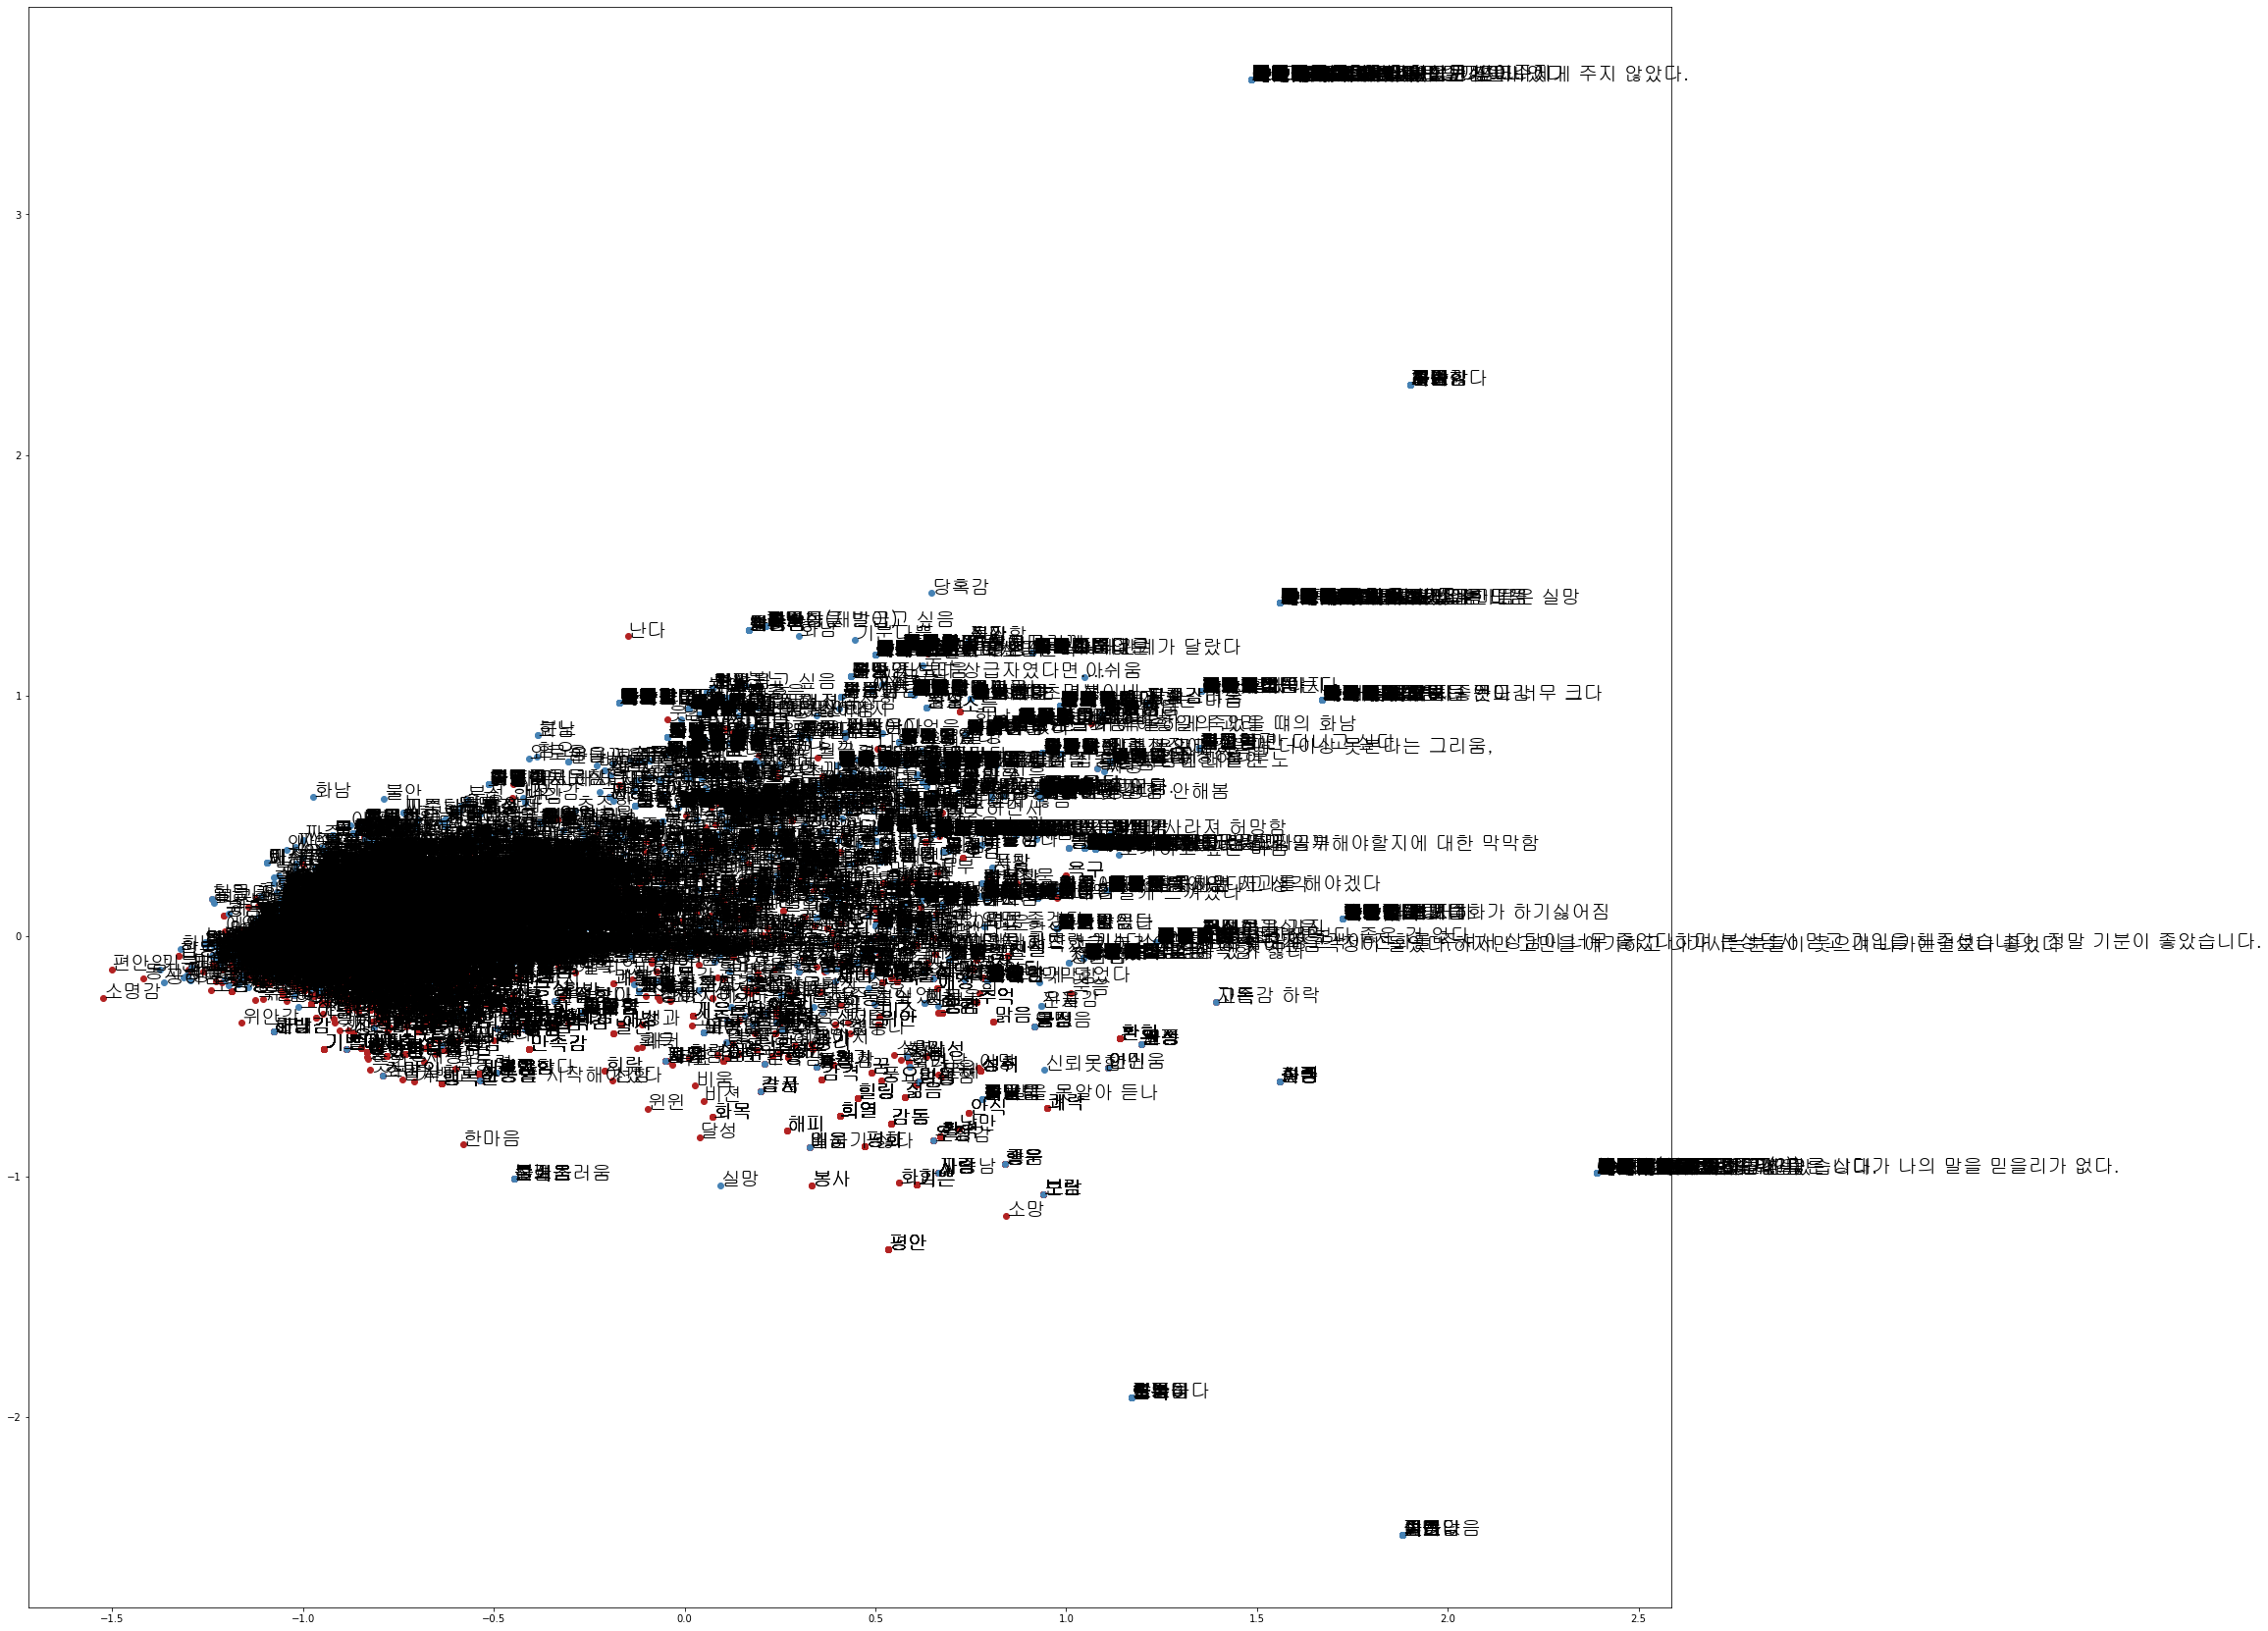

In [50]:
xs = xys[:15416,0]
ys = xys[:15416,1]
xz = xys[15416:,0]
yz = xys[15416:,1]
plt.figure(figsize=(30, 30))
plt.scatter(xs, ys, marker='o',c='#B22222')
plt.scatter(xz, yz, marker='o',c='#4682B4')
for i, v in enumerate(pos_words):
    plt.annotate(v, xy=(xs[i], ys[i]),fontproperties=fontprop)
for i, v in enumerate(neg_words):
    plt.annotate(v, xy=(xz[i], yz[i]),fontproperties=fontprop)

In [216]:
csv_list = []
for i, row in df.iterrows():
    csv_list.append([df.at[i, 'ID'],str(df.at[i, 'Positive experience']),str(df.at[i, 'PA1']),str(df.at[i, 'PA2']),
                     str(df.at[i, 'PA3']),str(df.at[i, 'PA4']),str(df.at[i, 'PA5']),df.at[i, 'PA1score'],
                     df.at[i, 'PA2score'],df.at[i, 'PA3score'],df.at[i, 'PA4score'],df.at[i, 'PA5score'],
                     df.at[i, 'Agree_M'],df.at[i, 'Con_M'],df.at[i, 'Extra_M'],df.at[i, 'Neuro_M'],df.at[i, 'Open_M']
                     ,df.at[i, 'char_type']])

f = open('D:\Jiyoon\emotion_type.csv', 'w', encoding='utf-8-sig',newline='')
wr = csv.writer(f)
wr.writerow(['ID','positive_experience','PA1','PA2','PA3','PA4','PA5','PA1score','PA2score','PA3score','PA4score','PA5score',
             'Agree_M','Con_M','Extra_M','Neuro_M','Open_M',"emotion_type"])
for i in range(len(csv_list)):
    wr.writerow([csv_list[i][0], csv_list[i][1], csv_list[i][2], csv_list[i][3], csv_list[i][4], csv_list[i][5]
                , csv_list[i][6], csv_list[i][7], csv_list[i][8], csv_list[i][9], csv_list[i][10], csv_list[i][11]
                , csv_list[i][12], csv_list[i][13], csv_list[i][14], csv_list[i][15], csv_list[i][16], csv_list[i][17]])

f.close()